In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [118]:
path = 'SeoulBikeData.csv'
df = pd.read_csv(path)

In [119]:
# Date, Seasons and Holiday are categorical values
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day               int64
dtype: object

In [120]:
X = df.drop('Rented Bike Count', axis= 1)
y = df['Rented Bike Count']
y.max()

9511

In [121]:
X['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [122]:
X_final = X.copy()

In [123]:
# Pre-processing the data
def OneHotEnconder_specificColumns( X_final, name : str ):
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    one_hot_encoderTransform = one_hot_encoder.fit_transform(X[[name]])
    X_final = pd.concat( [X_final, one_hot_encoderTransform], axis= 1).drop(columns=[name])
    return X_final

In [124]:
X_final = OneHotEnconder_specificColumns(X_final, 'Seasons')
X_final

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0


In [125]:
X_final = OneHotEnconder_specificColumns(X_final, 'Holiday')
X_final

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0


In [126]:
def SpecifyClass( max_item : int, numberOfClasses : int, number : float ) -> int:
    intervals = []
    for i in range(1, numberOfClasses + 1):
        intervals.append( i * max_item / numberOfClasses )
    class_number = 0
    for interval_range in intervals:
        if( number <= interval_range ):
            return class_number
        class_number += 1

def TransformToClasses( array, numberOfClasses : int ) -> np.array:
    if( numberOfClasses <= 2 or numberOfClasses >= 11 ):
        print("Not in the exercise boundaries")
        return
    arrayClasses = []
    max_item = max(array)
    for item in array:
        arrayClasses.append(SpecifyClass(max_item, numberOfClasses, item))
    return np.array(arrayClasses)

## Testing TransformToClasses
array = [1, 2, 3, 5, 6, 7]
arrayClass = TransformToClasses(array, numberOfClasses=7)
print(arrayClass)

[0 1 2 4 5 6]


In [127]:
date_str = str(X_final['Date'][0])
day, month, year = map(int, date_str.split('/'))
print(day, month, year)
date = datetime.date(year, month, day)
print(date.weekday())

1 12 2017
4


In [128]:
# Since that there is not much years to the dataset to visualize effects
# on weekend rented and so on i will use a week_day encoder.
week_days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday' ]
week_days_dataset = []
for date in X_final['Date']:
    date_str = str(date)
    day, month, year = map(int, date_str.split('/'))
    date = datetime.date(year, month, day)
    week_days_dataset.append(week_days[date.weekday()])
week_days_dataset = np.array( week_days_dataset )
week_days_dataset

array(['Friday', 'Friday', 'Friday', ..., 'Friday', 'Friday', 'Friday'],
      dtype='<U9')

In [130]:
X_final = X_final.drop(columns=['Date'])
X_final = pd.concat( [X_final, pd.DataFrame({'Date' : week_days_dataset})], axis= 1 )


In [131]:
X_final

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Date
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,Friday
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,Friday
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,Friday
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,Friday
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,Friday
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,Friday
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,Friday
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,Friday


In [132]:
X_test = OneHotEnconder_specificColumns(X_final, 'Date')

In [141]:
# Didn't use function since function is fit_transforming from X not X_final
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoderTransform = one_hot_encoder.fit_transform(X_final[['Date']])
X_final = pd.concat( [X_final, one_hot_encoderTransform], axis= 1).drop(columns=['Date'])

In [148]:
y_withClasses = TransformToClasses(y, 4)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_withClasses, test_size=0.2, random_state=42)


Text(0, 0.5, 'Accuracy')

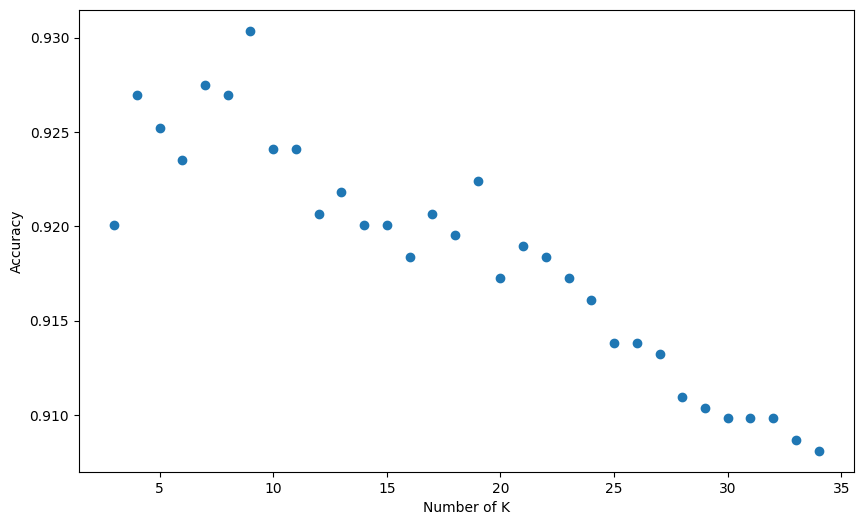

In [155]:
## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 35):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)
    
fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

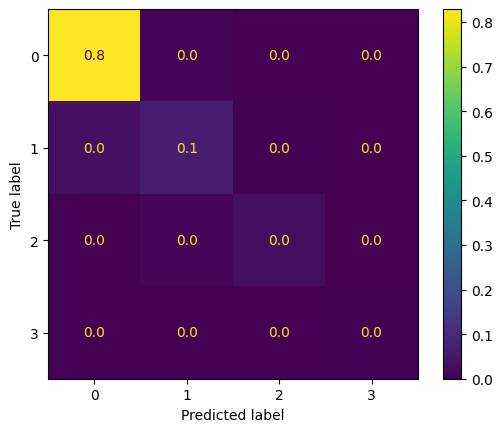

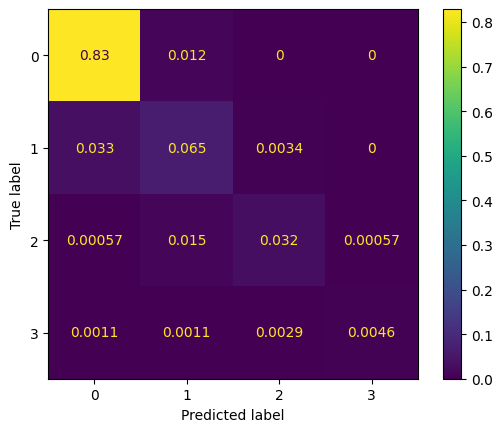

In [158]:
# From the plot we can say that the almost-optimal solution is k ≃ 25
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot(values_format='.1f')
disp.plot()
plt.show()